In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import string
from string import digits
import re

import pickle as pkl
import numpy as np
import pandas as pd


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/MOLD_train.tsv', sep='\t')
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NaN,NaN
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NaN,NaN
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NaN,NaN
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NaN,NaN
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NaN,NaN
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NaN
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
df1=df1.drop(df1.index[1981])
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NaN,NaN
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NaN,NaN
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NaN,NaN
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NaN,NaN
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NaN,NaN
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NaN
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
df1[(df1['subtask_a']=="OFF") & (df1['subtask_b']==np.nan)]

,id,tweet,subtask_a,subtask_b,subtask_c


In [ ]:
df1['subtask_b']=df1['subtask_b'].fillna('NOT')
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NaN
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NaN
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NaN
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NaN
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NaN
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NaN
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
train_df=df1
len(train_df)

3102

In [ ]:
b=list(train_df['subtask_b'])
temp=[]
for i in b:
  if(i=='NOT'):
    temp.append(i)
  elif(i=='UNT'):
    temp.append(0)
  elif(i=='TIN'):
    temp.append(1)

len(temp)

3102

In [ ]:
temp

In [ ]:
train_df['subtask_b']=temp

In [ ]:
train_df=train_df[train_df['subtask_b']!='NOT']
train_df

,id,tweet,subtask_a,subtask_b,subtask_c
1451,1451,राम कदम वागण्यात नाही तर बोलण्यात चुकला बीजेपी...,OFF,1,GRP
1452,1452,हीच का तुमची शिवसेने चि शिकवण आपली आई म्हणजे द...,OFF,1,GRP
1453,1453,हे वाचा गाढवांनो आणि हे ही सांगा की तुमच्या मॅ...,OFF,1,GRP
1454,1454,भक्त आंधळे असतात मूर्खा ना काही कळत नाही,OFF,1,GRP
1455,1455,१९६६ साली छत्रपती शिवाजी महाराज या जागतिक दर्ज...,OFF,1,GRP
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,0,NaN
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,1,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,1,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,1,OTH


In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
#replacing " ' " with an emptyspace
train_df['tweet'] = [re.sub("'",'',str(x)) for x in train_df['tweet']]

<ipython-input-12-d81ffc4cc31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['tweet'] = [re.sub("'",'',str(x)) for x in train_df['tweet']]


In [ ]:
#removing the punctuations
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

train_df['tweet'] = remove_punc(train_df['tweet'])

<ipython-input-13-7135bd1f9a59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['tweet'] = remove_punc(train_df['tweet'])


In [ ]:
# removing the digits 
train_df['tweet'] = [re.sub("[२३०८१५७९४६]","",x) for x in train_df['tweet']]
#removing emojis from the sentence
train_df['tweet'] = [re.sub("[\u200d]","",x) for x in train_df['tweet']]

<ipython-input-14-f54dd54ceb92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['tweet'] = [re.sub("[२३०८१५७९४६]","",x) for x in train_df['tweet']]
<ipython-input-14-f54dd54ceb92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['tweet'] = [re.sub("[\u200d]","",x) for x in train_df['tweet']]


In [ ]:
# removing the starting and ending whitespaces
train_df['tweet'] = [x.strip() for x in train_df['tweet']]

<ipython-input-15-0f5a0f34d5f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['tweet'] = [x.strip() for x in train_df['tweet']]


In [ ]:
train_df=train_df.drop('id',axis=1)


In [ ]:
train_df

,tweet,subtask_a,subtask_b,subtask_c
1451,राम कदम वागण्यात नाही तर बोलण्यात चुकला बीजेपी...,OFF,1,GRP
1452,हीच का तुमची शिवसेने चि शिकवण आपली आई म्हणजे द...,OFF,1,GRP
1453,हे वाचा गाढवांनो आणि हे ही सांगा की तुमच्या मॅ...,OFF,1,GRP
1454,भक्त आंधळे असतात मूर्खा ना काही कळत नाही,OFF,1,GRP
1455,साली छत्रपती शिवाजी महाराज या जागतिक दर्जाच्या...,OFF,1,GRP
...,...,...,...,...
3098,USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,0,NaN
3099,USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायला...,OFF,1,OTH
3100,USER पुच्ची कप्तान साब,OFF,1,OTH
3101,USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाटा...,OFF,1,OTH


In [ ]:
# print(df1['tweet'][1]+"\n")
# print(df1['tweet'][45]+"\n")
# print(df1['tweet'][88]+"\n")

In [ ]:
# # print(train_df['tweet'][1]+"\n")
# print(train_df['tweet'][45]+"\n")
# print(train_df['tweet'][88]+"\n")

In [ ]:
temp_df=train_df
train, test = train_test_split(temp_df, test_size=0.3,random_state=19)
val, test = train_test_split(test, test_size=0.5,random_state=19)

In [ ]:
train

,tweet,subtask_a,subtask_b,subtask_c
1612,अरे बावळट माणसा तूझ्या विष्णूच्या अवताराने नौक...,OFF,1,IND
1983,च्यायला म्हणजे दुबईचा फोन ही पुडीच निघाली की,OFF,0,NaN
1536,आताच आलेल्या माहिती नुसार खाजपा मध्ये पागल झा...,OFF,1,GRP
1734,मंद बुद्धीचे प्राणी फार भटकत आहेतजरा तोंडाला ल...,OFF,1,IND
2470,USER बावळट गप बस,OFF,1,IND
...,...,...,...,...
1759,आता तुला आरक्षणाचे साधे फायदे समजत नाहीत हे पा...,OFF,1,IND
3028,USER कोण आहे चायला काय धंदे राव लोकांचे,OFF,0,NaN
2399,नालायक मोदी सरकार ते वयोगटातील व्यक्तींना लसीस...,OFF,1,GRP
2209,एकदा एका मित्राने मैत्रिणीला विचारले कि तू तों...,OFF,0,NaN


In [ ]:
test

,tweet,subtask_a,subtask_b,subtask_c
1545,असल्या मंद सैनिकांच्या नादाला लागायचं नाही कर...,OFF,1,GRP
1509,तुम्ही कंगनाच काय घेऊन बसलात जर मुंबई महानगरपा...,OFF,1,GRP
2475,USER महाराष्ट्रचा बघ न बावळट। तू पण नुसता मुंब...,OFF,1,IND
2085,दळभद्री लोक नकोच बर झाल गेल बिहार ला,OFF,0,NaN
1895,निल्या तु लहान आहेस अजुन तुझ्या मापाची हाफ चड्...,OFF,1,IND
...,...,...,...,...
2104,मंद बुद्धीचे प्राणी फार भटकत आहेतजरा तोंडाला ल...,OFF,0,NaN
1515,पडायला शेठ जबाबदार नाही असं अंडभक्त म्हणतात पण...,OFF,1,GRP
2512,USER सर्वच राजकीय पक्षांमध्ये बावळट लोक असतातप...,OFF,1,GRP
2496,USER बावळट कधीचेही व्हिडिओ दाखवतो,OFF,1,IND


In [ ]:
val

,tweet,subtask_a,subtask_b,subtask_c
2184,जे सरकार साधं करू शकत नाही ते कसलं दळभद्री पुर...,OFF,0,NaN
2444,USER USER दलालमीडिया महा नालायक USER को फिर से...,OFF,1,GRP
2369,USER अहो त्याचा रोजगार गेला ना तो महिन्याला प...,OFF,1,OTH
2308,महागाई ची तुलना हिंदू धर्मा बरोबर करणारा हा चू...,OFF,1,IND
2339,USER USER चुतिया,OFF,1,GRP
...,...,...,...,...
2163,मुर्खाशिवाजी राज्य संपले वर्षातच बामनांनी संप...,OFF,0,NaN
1881,साली रंडी,OFF,1,IND
1998,मुर्खा सारखे नकोतिथे मराठी अस्मितेच्या नावावर ...,OFF,0,NaN
1907,वेड्या माणसा मराठा आरक्षणासाठी फडणवीस मुख्यमंत...,OFF,1,IND


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.4 MB/s 
     |████████████████████████████████| 7.6 MB 40.7 MB/s 
     |████████████████████████████████| 182 kB 63.7 MB/s 


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
tokenizers = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
models = BertModel.from_pretrained("bert-base-multilingual-uncased")

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train_embedings = []
train_labels=[]
ok=0
for i,j in zip(train['tweet'],train['subtask_b']):
  if(ok%500==0):print(ok)
  ok=ok+1
  try:
    encoded_input = tokenizers(i, return_tensors='pt')
    output = models(**encoded_input)
    train_embedings.append(output.last_hidden_state[0][0].detach().numpy())
    train_labels.append(j)
  except:
    continue

0
500


In [ ]:
train_embedings=np.asarray(train_embedings)
train_embedings.shape

(747, 768)

In [ ]:
train_labels=np.asarray(train_labels)
train_labels.shape

(747,)

In [ ]:
test_embedings = []
test_labels=[]
ok=0
for i,j in zip(val['tweet'],val['subtask_b']):
  if(ok%500==0):print(ok)
  ok=ok+1
  try:
    encoded_input = tokenizers(i, return_tensors='pt')
    output = models(**encoded_input)
    test_embedings.append(output.last_hidden_state[0][0].detach().numpy())
    test_labels.append(j)
  except:
    continue

0


In [ ]:
test_embedings=np.asarray(test_embedings)
test_labels=np.asarray(test_labels)

In [ ]:
test_embedings.shape,test_labels.shape

((160, 768), (160,))

In [ ]:
test_labels

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1])

In [ ]:
from keras.utils import to_categorical
test_labels=to_categorical(test_labels)
train_labels=to_categorical(train_labels)

In [ ]:
train_embedings.shape,test_embedings.shape

((747, 768), (160, 768))

In [ ]:
train_labels.shape,test_labels.shape

((747, 2), (160, 2))

In [ ]:
train_embedings=np.reshape(train_embedings,(747,-1,768))
test_embedings=np.reshape(test_embedings,(160,-1,768))

In [ ]:
train_embedings.shape,test_embedings.shape

((747, 1, 768), (160, 1, 768))

In [ ]:
train_labels.shape,test_labels.shape

((747, 2), (160, 2))

In [ ]:
models.config.hidden_size

768

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=768,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               1049600   
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1,090,882
Trainable params: 1,090,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2=model.fit(x=train_embedings,y=train_labels,epochs=100,validation_data=(test_embedings,test_labels))

Epoch 1/100
24/24 [==============================] - 3s 36ms/step - loss: 0.6218 - accuracy: 0.7055 - val_loss: 0.7031 - val_accuracy: 0.6250
Epoch 2/100
24/24 [==============================] - 0s 20ms/step - loss: 0.6114 - accuracy: 0.7055 - val_loss: 0.6733 - val_accuracy: 0.6250
Epoch 3/100
24/24 [==============================] - 0s 18ms/step - loss: 0.5989 - accuracy: 0.7055 - val_loss: 0.6848 - val_accuracy: 0.6250
Epoch 4/100
24/24 [==============================] - 0s 17ms/step - loss: 0.5962 - accuracy: 0.7055 - val_loss: 0.6680 - val_accuracy: 0.6250
Epoch 5/100
24/24 [==============================] - 0s 21ms/step - loss: 0.5920 - accuracy: 0.7055 - val_loss: 0.6924 - val_accuracy: 0.6250
Epoch 6/100
24/24 [==============================] - 0s 20ms/step - loss: 0.5816 - accuracy: 0.7055 - val_loss: 0.6474 - val_accuracy: 0.6250
Epoch 7/100
24/24 [==============================] - 0s 20ms/step - loss: 0.5745 - accuracy: 0.7122 - val_loss: 0.7126 - val_accuracy: 0.6250
Epoch 

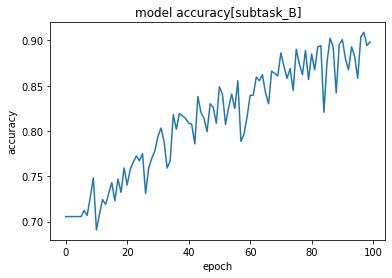

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history2.history['accuracy'])
plt.title('model accuracy[subtask_B]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
model_json = model.to_json()
with open("copy_subtaskB.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("copy_subtaskB.h5")

# **BiLSTM**

In [ ]:
BILstmmodel = Sequential()
BILstmmodel.add(Bidirectional(LSTM(100, input_shape=(747,1,768), return_sequences=True)))
BILstmmodel.add(Dropout(0.3))
BILstmmodel.add(Bidirectional(LSTM(20)))
BILstmmodel.add(Dropout(0.2))
BILstmmodel.add(Dense(20, activation='relu'))
BILstmmodel.add(Dropout(0.4))
BILstmmodel.add(Dense(2, activation='sigmoid'))




In [ ]:
BILstmmodel.build((747,1,768))
BILstmmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (747, 1, 200)            695200    
 l)                                                              
                                                                 
 dropout (Dropout)           (747, 1, 200)             0         
                                                                 
 bidirectional_1 (Bidirectio  (747, 40)                35360     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (747, 40)                 0         
                                                                 
 dense_3 (Dense)             (747, 20)                 820       
                                                                 
 dropout_2 (Dropout)         (747, 20)                

In [ ]:
BILstmmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=BILstmmodel.fit(x=train_embedings,y=train_labels,epochs=100,validation_data=(test_embedings,test_labels))

Epoch 1/100
24/24 [==============================] - 15s 94ms/step - loss: 0.6367 - accuracy: 0.7001 - val_loss: 0.6762 - val_accuracy: 0.6250
Epoch 2/100
24/24 [==============================] - 0s 19ms/step - loss: 0.6210 - accuracy: 0.7055 - val_loss: 0.6649 - val_accuracy: 0.6250
Epoch 3/100
24/24 [==============================] - 0s 20ms/step - loss: 0.6143 - accuracy: 0.7055 - val_loss: 0.6706 - val_accuracy: 0.6250
Epoch 4/100
24/24 [==============================] - 0s 21ms/step - loss: 0.6232 - accuracy: 0.7055 - val_loss: 0.6677 - val_accuracy: 0.6250
Epoch 5/100
24/24 [==============================] - 0s 20ms/step - loss: 0.6220 - accuracy: 0.7055 - val_loss: 0.6651 - val_accuracy: 0.6250
Epoch 6/100
24/24 [==============================] - 0s 20ms/step - loss: 0.6152 - accuracy: 0.7055 - val_loss: 0.6639 - val_accuracy: 0.6250
Epoch 7/100
24/24 [==============================] - 1s 21ms/step - loss: 0.6136 - accuracy: 0.7055 - val_loss: 0.6710 - val_accuracy: 0.6250
Epoch

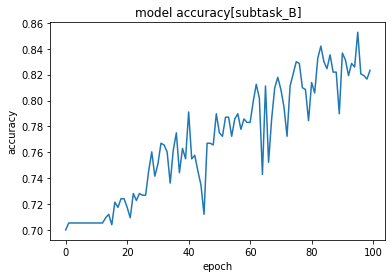

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy[subtask_B]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Performance

In [ ]:
test_df=test
test_df

,tweet,subtask_a,subtask_b,subtask_c
1545,असल्या मंद सैनिकांच्या नादाला लागायचं नाही कर...,OFF,1,GRP
1509,तुम्ही कंगनाच काय घेऊन बसलात जर मुंबई महानगरपा...,OFF,1,GRP
2475,USER महाराष्ट्रचा बघ न बावळट। तू पण नुसता मुंब...,OFF,1,IND
2085,दळभद्री लोक नकोच बर झाल गेल बिहार ला,OFF,0,NaN
1895,निल्या तु लहान आहेस अजुन तुझ्या मापाची हाफ चड्...,OFF,1,IND
...,...,...,...,...
2104,मंद बुद्धीचे प्राणी फार भटकत आहेतजरा तोंडाला ल...,OFF,0,NaN
1515,पडायला शेठ जबाबदार नाही असं अंडभक्त म्हणतात पण...,OFF,1,GRP
2512,USER सर्वच राजकीय पक्षांमध्ये बावळट लोक असतातप...,OFF,1,GRP
2496,USER बावळट कधीचेही व्हिडिओ दाखवतो,OFF,1,IND


In [ ]:
def embed_text(text):
  a=[]
  encoded_input = tokenizers(text, return_tensors='pt')
  output = models(**encoded_input)
  a.append(output.last_hidden_state[0][0].detach().numpy())
  a=np.asarray(a)
  b=a.reshape(a.shape[0],-1,a.shape[1])
  return b


In [ ]:
a1=embed_text('USER तुमच्या पक्षाचे काय झाले ते बघा आधी मंद')
out1=np.argmax(model.predict(a1)) #LSTM model
out1

1/1 [==============================] - 0s 33ms/step


1

In [ ]:
out2=np.argmax(BILstmmodel.predict(a1)) #LSTM model
out2

1/1 [==============================] - 3s 3s/step


1

### **BiLSTM**

In [ ]:
rand_list=[]
for i in test_df['tweet']:
  embeded_tweet=embed_text(i)
  rand_list.append(np.argmax(BILstmmodel.predict(embeded_tweet)))

test_df['predicted_output']=rand_list

test_df

1/1 [==============================] - 0s 22ms/step


,tweet,subtask_a,subtask_b,subtask_c,predicted_output
1545,असल्या मंद सैनिकांच्या नादाला लागायचं नाही कर...,OFF,1,GRP,1
1509,तुम्ही कंगनाच काय घेऊन बसलात जर मुंबई महानगरपा...,OFF,1,GRP,1
2475,USER महाराष्ट्रचा बघ न बावळट। तू पण नुसता मुंब...,OFF,1,IND,0
2085,दळभद्री लोक नकोच बर झाल गेल बिहार ला,OFF,0,NaN,1
1895,निल्या तु लहान आहेस अजुन तुझ्या मापाची हाफ चड्...,OFF,1,IND,1
...,...,...,...,...,...
2104,मंद बुद्धीचे प्राणी फार भटकत आहेतजरा तोंडाला ल...,OFF,0,NaN,1
1515,पडायला शेठ जबाबदार नाही असं अंडभक्त म्हणतात पण...,OFF,1,GRP,1
2512,USER सर्वच राजकीय पक्षांमध्ये बावळट लोक असतातप...,OFF,1,GRP,0
2496,USER बावळट कधीचेही व्हिडिओ दाखवतो,OFF,1,IND,1


### **LSTM**

In [ ]:
rand_list=[]
for i in test_df['tweet']:
  embeded_tweet=embed_text(i)
  rand_list.append(np.argmax(model.predict(embeded_tweet)))

test_df['LSTM_predicted_output']=rand_list

test_df

1/1 [==============================] - 0s 22ms/step


,tweet,subtask_a,subtask_b,subtask_c,predicted_output,LSTM_predicted_output
1545,असल्या मंद सैनिकांच्या नादाला लागायचं नाही कर...,OFF,1,GRP,1,1
1509,तुम्ही कंगनाच काय घेऊन बसलात जर मुंबई महानगरपा...,OFF,1,GRP,1,1
2475,USER महाराष्ट्रचा बघ न बावळट। तू पण नुसता मुंब...,OFF,1,IND,0,1
2085,दळभद्री लोक नकोच बर झाल गेल बिहार ला,OFF,0,NaN,1,1
1895,निल्या तु लहान आहेस अजुन तुझ्या मापाची हाफ चड्...,OFF,1,IND,1,1
...,...,...,...,...,...,...
2104,मंद बुद्धीचे प्राणी फार भटकत आहेतजरा तोंडाला ल...,OFF,0,NaN,1,1
1515,पडायला शेठ जबाबदार नाही असं अंडभक्त म्हणतात पण...,OFF,1,GRP,1,1
2512,USER सर्वच राजकीय पक्षांमध्ये बावळट लोक असतातप...,OFF,1,GRP,0,0
2496,USER बावळट कधीचेही व्हिडिओ दाखवतो,OFF,1,IND,1,1


In [ ]:
ypred2=np.asarray(list(test_df['LSTM_predicted_output']))
ytrue2=np.asarray(list(test['subtask_b']))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytrue2,ypred2))

              precision    recall  f1-score   support

           0       0.43      0.26      0.32        47
           1       0.74      0.86      0.79       114

    accuracy                           0.68       161
   macro avg       0.58      0.56      0.56       161
weighted avg       0.65      0.68      0.66       161

